In [1]:
# processing
import numpy as np
import pandas as pd
from Bio import SeqIO

# custom packages
import tregs

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Loading input data

In [2]:
_genome = []
for record in SeqIO.parse("../../data/mg1655_genome.fasta", "fasta"):
    _genome.append(str(record.seq))
genome = _genome[0]

In [3]:
# Promoter
rnap_site = 'CAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG'

In [4]:
## Find the transcription start site
df = pd.read_csv('../../data/ecoli_gene_list.csv')
lacZYA_TSS = int(df[(df.gene == 'lacZ') & (df.promoter == 'lacZp1')]['tss'].iloc[0])
promoter = tregs.seq_utils.get_regulatory_region(genome, lacZYA_TSS, reverse=True)

In [5]:
# obtained from https://journals.plos.org/ploscompbiol/article/figure?id=10.1371/journal.pcbi.1002811.g002

rnap_emat_raw = np.loadtxt('../../data/energy_matrices/RNAP_energy_matrix.txt')
rnap_emat = tregs.simulate.fix_wt(rnap_emat_raw, rnap_site)

#rep_emat = rnap_emat[(len(rnap_site) - len(original_rep_site)):(len(rnap_site))]

In [6]:
original_rep_site = 'AATTGTGAGCGGATAACAATT'
print('The length of the original repressor binding site is {}.'.format(len(original_rep_site)))

The length of the original repressor binding site is 21.


In [7]:
O1_1027_raw = np.load('../../data/energy_matrices/lacThermoforTO1.npy')

O1_1027_fixed = np.zeros(np.shape(O1_1027_raw))
for i in range(3):
    O1_1027_fixed[i] = tregs.simulate.fix_wt(O1_1027_raw[i], original_rep_site)

rep_emat = np.mean(O1_1027_fixed, axis=0)

### Assuming the the repressor has the same energy matrix has the RNAP

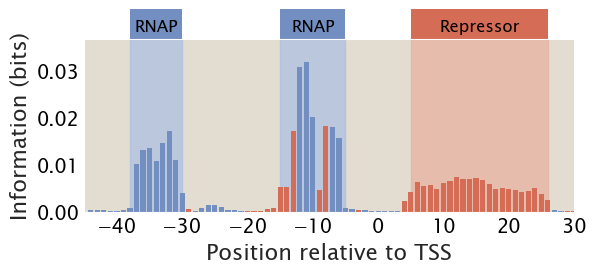

In [8]:
rep_site = promoter[(115+5):(115+5+len(original_rep_site))]

rep_emat = tregs.simulate.generate_emap(rep_site, fixed=True, fixed_value=1)

n_NS = len(genome)
ep_wt, er_wt = -5, -15
n_p = 5000
n_r = 10

df = tregs.simulate.sim(promoter, tregs.simulate.simrep_pbound, [rnap_site, rep_site], 
                        *[n_NS, n_p, n_r, rnap_emat, rep_emat, ep_wt, er_wt])

region_params = [(-38, -30, 'P', 'RNAP'), (-15, -5, 'P', 'RNAP'), (5, 5+len(original_rep_site), 'R', 'Repressor')]
tregs.footprint.plot_footprint(promoter, df, region_params,
                               x_lims=(-45, 30), fig_width=6, fig_height=3,
                               legend_xcoord=1.35,
                               annotate_stn=False,
                               outfile='../plots/fig14/overlapping_fp1.pdf')

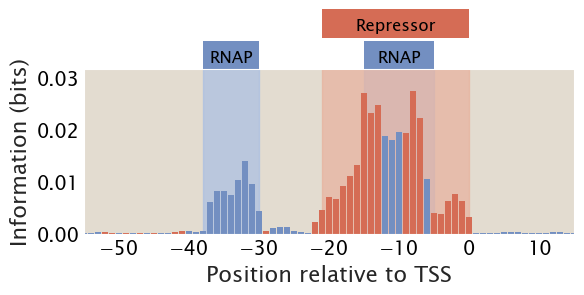

In [9]:
rep_site = rnap_site[(len(rnap_site) - len(original_rep_site)):(len(rnap_site))]

rep_emat = tregs.simulate.generate_emap(rep_site, fixed=True, fixed_value=1)

n_NS = len(genome)
ep_wt, er_wt = -5, -15
n_p = 5000
n_r = 10

df = tregs.simulate.sim(promoter, tregs.simulate.simrep_pbound, [rnap_site, rep_site], 
                        *[n_NS, n_p, n_r, rnap_emat, rep_emat, ep_wt, er_wt])

region_params = [(-38, -30, 'P', 'RNAP'), (-15, -5, 'P', 'RNAP'), (-21, 0, 'R', 'Repressor', True)]
tregs.footprint.plot_footprint(promoter, df, region_params,
                               x_lims=(-55, 15), fig_width=6, fig_height=3.5,
                               legend_xcoord=1.35,
                               annotate_stn=False,
                               outfile='../plots/fig14/overlapping_fp2.pdf')

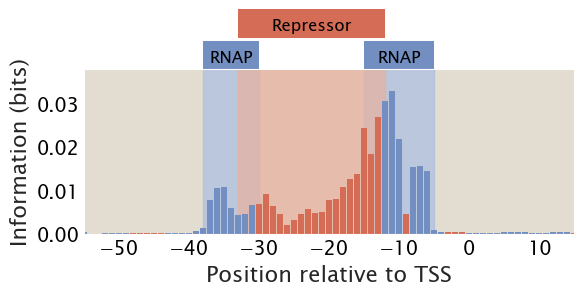

In [10]:
rep_site = rnap_site[(len(rnap_site) - len(original_rep_site) - 12):(len(rnap_site) - 12)]

rep_emat = tregs.simulate.generate_emap(rep_site, fixed=True, fixed_value=1)

#O1_1027_raw = np.load('../../data/energy_matrices/lacThermoforTO1.npy')

#O1_1027_fixed = np.zeros(np.shape(O1_1027_raw))
#for i in range(3):
#    O1_1027_fixed[i] = tregs.simulate.fix_wt(O1_1027_raw[i], rep_site)

#rep_emat = np.mean(O1_1027_fixed, axis=0)

n_NS = len(genome)
ep_wt, er_wt = -5, -15
n_p = 5000
n_r = 10

df = tregs.simulate.sim(promoter, tregs.simulate.simrep_pbound, [rnap_site, rep_site], 
                        *[n_NS, n_p, n_r, rnap_emat, rep_emat, ep_wt, er_wt])

region_params = [(-38, -30, 'P', 'RNAP'), (-15, -5, 'P', 'RNAP'), (-33, -12, 'R', 'Repressor', True)]
tregs.footprint.plot_footprint(promoter, df, region_params,
                               x_lims=(-55, 15), fig_width=6, fig_height=3.5,
                               legend_xcoord=1.35,
                               annotate_stn=False,
                               outfile='../plots/fig14/overlapping_fp3.pdf')